# Capstone 3: Rossmann Store Analysis

![image](https://github.com/dyjsbennett/Portfolio/raw/main/Thinkful%20Data%20Analytics%20Immersion%20Capstone%203/Raw%20Data/Image.jpg)


## Objective

We will be building a predictive model using the Rossmann sales data set that can be found at https://www.kaggle.com/c/rossmann-store-sales/ Our objective is to use the data set to train a regression model.

## Import libraries and set up the dataframe.

Import Libraries

In [1]:
# Import the needed libraries
import numpy as np
import pandas as pd
import seaborn as sns
import pylab as pl
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm
from sklearn.preprocessing import PolynomialFeatures as pf
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
sns.set()

Install Pandas Profiling, enable widgets and import the profiling fuction

In [2]:
# Install Pandas Profiling via pip
! pip install -U pandas-profiling[notebook]

# Enable the widget extension in Jupyter
! jupyter nbextension enable --py widgetsnbextension

# Import pandas profile
from pandas_profiling import ProfileReport

Requirement already up-to-date: pandas-profiling[notebook] in c:\programdata\anaconda3\lib\site-packages (2.11.0)


Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: ok


Import the data and create data frames using Pandas.

In [3]:
# Create seperate data frames for store, training sales, and test data set
df_store = pd.read_csv('https://raw.githubusercontent.com/dyjsbennett/Portfolio/main/Thinkful%20Data%20Analytics%20Immersion%20Capstone%203/Raw%20Data/store.csv')
df_trainsales = pd.read_csv('https://github.com/dyjsbennett/Portfolio/raw/main/Thinkful%20Data%20Analytics%20Immersion%20Capstone%203/Raw%20Data/train.csv')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


## Merge the data frames together and clean the data.

Combine the store and sales data frames to allow for store analysis of sales.

In [4]:
# Combine the store and training dataframes. Determine how how large the data set it.
df_store_sales = pd.merge(df_trainsales,
                          df_store,
                          on = 'Store',
                          how = 'left')
df_store_sales.head()

Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5  2015-07-31   5263        555     1      1            0   
1      2          5  2015-07-31   6064        625     1      1            0   
2      3          5  2015-07-31   8314        821     1      1            0   
3      4          5  2015-07-31  13995       1498     1      1            0   
4      5          5  2015-07-31   4822        559     1      1            0   

   SchoolHoliday StoreType Assortment  CompetitionDistance  \
0              1         c          a               1270.0   
1              1         a          a                570.0   
2              1         a          a              14130.0   
3              1         c          c                620.0   
4              1         a          a              29910.0   

   CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                        9.0                    2008.0       0   
1                       11.0                    2007.0       1   
2                       12.0                    2006.0       1   
3                        9.0                    2009.0       0   
4                        4.0                    2015.0       0   

   Promo2SinceWeek  Promo2SinceYear    PromoInterval  
0              NaN              NaN              NaN  
1             13.0           2010.0  Jan,Apr,Jul,Oct  
2             14.0           2011.0  Jan,Apr,Jul,Oct  
3              NaN              NaN              NaN  
4              NaN              NaN              NaN

# Randomly subset the data for computing practicality

In [5]:
# drop nulls from comp distance
df_no_nulls = df_store_sales.dropna(subset=['CompetitionDistance'])

# Randomly retrieveing 1000 rows and setting the state so the same data can be reproduced 
df_rand = df_no_nulls.sample(n= 2500, random_state = 24)
df_rand.shape

(2500, 18)

In [15]:
# Explore the data with Pandas Profiling
profile = ProfileReport(df_rand, title='Sales by Store Pandas Profiling Report', explorative = True)
profile

## Plot the data

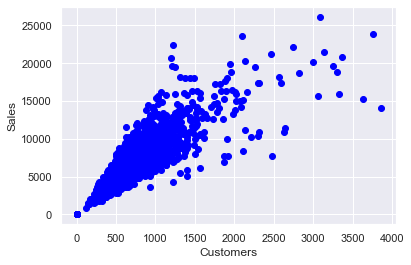

In [6]:
# Plot customers vs Sales
plt.scatter(df_rand.Customers, df_rand.Sales, color='blue')
plt.xlabel('Customers')
plt.ylabel('Sales')
plt.show()

# Linear Regression

In [7]:
# one hot encode the 'StoreType' and 'Assortment' columns
one_hot = pd.get_dummies(df_rand['StoreType'])
df_one_hot = df_rand.join(one_hot)
df_one_hot = df_one_hot.rename(columns={"a": "Store_Type_a", "b": "Store_Type_b","c": "Store_Type_c", "d":"Store_Type_d"})

one_hot2 = pd.get_dummies(df_one_hot['Assortment'])
df_one_hot = df_one_hot.join(one_hot2)
df_one_hot = df_one_hot.rename(columns={"a": "Assortment_a", "b": "Assortment_b", "c": "Assortment_c"})

In [8]:
# assign X and y from one hot encoded dataframe
features = ['DayOfWeek','Customers','Promo','CompetitionDistance','Store_Type_a', 'Store_Type_b', 'Store_Type_c', 'Store_Type_d', 'Assortment_a', 'Assortment_b', 'Assortment_c']

X = np.asanyarray(df_one_hot[features])
y = np.asanyarray(df_one_hot['Sales'])

In [9]:
# use test_train_split to split the data for training and testing. Split will be 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=24)

In [16]:
# manual data split, 80% train, 20% test
# msk = np.random.rand(len(df_one_hot)) < 0.8
# train = df_one_hot[msk]
# test = df_one_hot[~msk]

In [21]:
# preparing to train model, assign x and y from the train data frame
# features = ['DayOfWeek','Customers','CompetitionDistance','Store_Type_a', 'Store_Type_b', 'Store_Type_c', 'Store_Type_d', 'Assortment_a', 'Assortment_b', 'Assortment_c']

#x= np.asanyarray(train[features])
#y= np.asanyarray(train['Sales'])


In [10]:
# define linear model and fit to training data set. Print out coefficients.
lmodel = linear_model.LinearRegression()
lmodel.fit(X_train,y_train)
print('Coefficients: ', list(zip(features, lmodel.coef_))) 

Coefficients:  [('DayOfWeek', -105.82260711396212), ('Customers', 7.909390161564939), ('Promo', 1088.400039758036), ('CompetitionDistance', 0.01935959218242772), ('Store_Type_a', 814.0294574857029), ('Store_Type_b', -3354.9006317112985), ('Store_Type_c', 707.9802600472065), ('Store_Type_d', 1832.8909141783913), ('Assortment_a', 1133.4459759629265), ('Assortment_b', -2563.935803616475), ('Assortment_c', 1430.4898276535464)]


In [11]:
# test the model on the test data set
y_hat = lmodel.predict(X_test)

print("Residual sum of squares: %.2f"
     %np.mean((y_hat - y_test) ** 2))

print('Variance score: %.2f' % lmodel.score(X_test, y_test))

Residual sum of squares: 1859725.60
Variance score: 0.89


## Cross validation

In [12]:
clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
clf.score(X_test, y_test)

0.194

In [13]:
clf = svm.SVC(kernel='linear', C=1, random_state=24)
scores = cross_val_score(clf, X, y, cv=5)
scores

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


array([0.17 , 0.168, 0.168, 0.17 , 0.168])